<a href="https://colab.research.google.com/github/2020-Programming-Outreach/Discover-and-Ignite/blob/gh-pages/OUTREACHPT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2021 The year of the Aliens

The year is 2021, the pandemic has finally ceased. But now there is a new threat. An alien colony known as the Xenino-9 has landed on earth to continue their legacy and colonize yet another fruitful planet. The newly created and highly secret task force Candian's Against Harmful Aliens (CAHA) has tasked you with implementing a technology that will allow the Canadian Government to simulate and predict the actions of the Xenino-9 colony before it is too late!!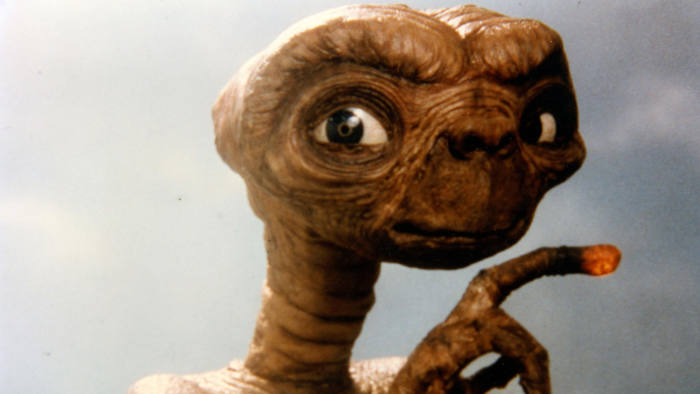 

# Intel

Unfortunately for us, the Xenino-9 colony is known to be very destructive and to not have any symptathy for any native lifeforms to the planets they colonize. Fortunately, they are very slow creatures and they are highly predictable. Based on highly confidential data gathered by CAHA, it is possible to create a technology which will allow us to know the Xenino-9's next move well before they make it and in turn defend and eventually defeat the Xenino-9 colony. 

Your first task is to have the computer read the data about Xenino-9:

In [ ]:
# run me!! You do not need to understand what is going on here at this point. 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
# Apply the default theme
sns.set_theme()
import pandas as pd


In [ ]:
# below is something called a function: a function can be used to encapsulate a piece of code to be easily used. 
# for example: the function below will take two numbers and add them together

def sum(a, b):
  """
  returns the sum of a and b
  """
  return a + b

# 1+1=2!
answer = sum(1, 1)
# print out answer
answer

In [ ]:
# we need to be able to load the data about Xenino-9:
# to do so, a function has been written for you, you must call the function, 
# just like what was done above with the sum function: sum(1, 1)

def read_data():
    # this function reads the data about the Xenino-9 colony
    url = 'https://raw.githubusercontent.com/2020-Programming-Outreach/Discover-and-Ignite/gh-pages/assets/alien_data.csv'
    df = pd.read_csv(url, error_bad_lines=False)
    return df

# TODO: Use read_data function
data = 
# show data
data

# Predicting Their Next Move!

As you can see, at any point in time, we can know their location, and the expected time they will spend there. The Xenino-9 have teleportation capabilities and so their next location can be anywheres in the country. We can determine their next location based on a clever algorithm developed by some of the lead investigators in CAHA. This algorithm was proven to be 100% accurate based on recent studies on the Xenino-9 invasion in other regions of Earth. Each city is given an ID based on geographic features, this allows us to effectively use the algorithm to predict their next move.

An algorithm is simply a set of instructions. For example, the algorithm you use to make toast may be: 1. Put bread in toaster, 2. get butter out of fridge, 3. butter toast

The algorithm to determine the next destination is as follows:

1. Double the city ID
2. Add 2 to doubled value
3. Divide by two 

Below is the algorithm coded up for you

In [ ]:
def calculate_next_location(city_ID):
    # double the city ID
    city_ID = city_ID*2
    # add two to the doubled value
    city_ID = city_ID+2
    # divide the value by two
    city_ID = city_ID/2
    return city_ID

# showing how to use function:
ID = 1
calculate_next_location(ID)

# Amount of Xenino-9 species expected
Now that we are able to tell where the Xenino-9 will go next, we should focus on determining how many of them there will be. We can do some simple math to determine their predicted populatuion size based on their starting population and the amount of time they spend in a given area. The Xenino-9 species is known to reproduce extremely fast and so it is important that we are able to calculate just how many of the pests will be showing up to the next location. 

To determine the predicted size we will use the below function: it will choose a random number between 0.0 and 1.0, if the number is greater than 0.5 they will increase in population, otherwise they will not. 


In [ ]:
def predicted_size_of_population(current_population):
    probability_of_increase = np.random.rand()
    if probability_of_increase > 0.5:
        return current_population + np.random.randint(0, 100)
    return current_population

# show how to use the function
current_population = 10
predicted_size_of_population(current_population)

# Number of people to combat Xenino-9
Because the Xenino-9 travel so sporradically and quickly. Our defense plan is to post humans up in equal numbers at each city. This way we will be able to be able to react in time using our predicted data. Humans will be able to reduce the population of the Xenino-9 species. We can also use some simple math to predict this, the function below will help us determine how effective a given amount of humans will be against a given amount of Xenino-9 species. 

In [ ]:
def humans_vs_xenino_9(number_of_humans, number_of_xenino_9):
    return int(max(0, number_of_xenino_9 - (np.random.rand()*number_of_humans)))

n_h = 15
n_x = 30
humans_vs_xenino_9(n_h, n_x)

# Putting it all Together

Now that we can predict their next move, the amount of them that will spawn and also how much humans will get rid of. It is time to put all of the pieces together!!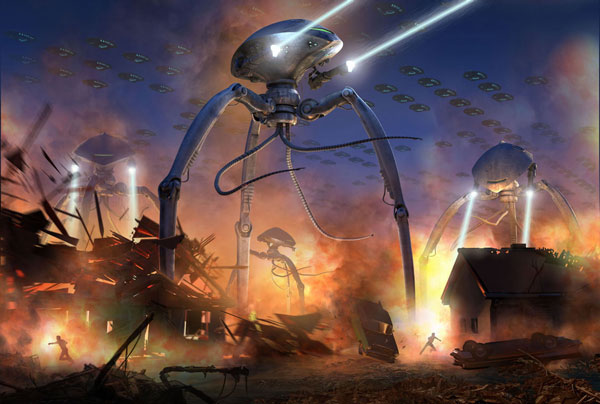

In [ ]:
len(data)

In [ ]:


# Number of Humans at each location
number_of_humans = 10
# number of starting xenino-9
number_of_xenino9 = 15000

# load the data ( remmember the read_data() function!)
data = read_data()

# below will be the simulation
# start off with city id 0
city_id = 0
# while there are still some xenino-9 species left
# dont worry you do not need to completely understand the code below!
results = []
while number_of_xenino9 > 0:
  print("The xenino-9 are in: {}".format(data['City, Prov'][city_id]))
  print("there are {} xenino-9, and {} humans".format(number_of_xenino9, number_of_humans))
  # get the time spent in the current town
  time_spent = data['Estimated Duration of Time'][city_id]

  # for each time step we must simulate humans vs. xenino-9
  for i in range(time_spent):
      number_of_xenino9 = predicted_size_of_population(current_population)
      number_of_xenino9 = humans_vs_xenino_9(number_of_humans, number_of_xenino9)

  results.append(number_of_xenino9)
  # calculate the next city ID
  city_id = calculate_next_location(city_id)
  # check if they have visited all the cities yet
  if len(data) < city_id:
      print("Humans are defeated by Xenino-9")
      exit()
print("humans succesfully defeated Xenino-9")



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# VISUALIZE
fig = plt.figure()
graph, = plt.plot([], [], 'o')
def animate(i):
    graph.set_data(data['lat'][:i+1].astype(float), data['lon'][:i+1].astype(float))
    return graph

ani = FuncAnimation(fig, animate, frames=10, interval=200)
plt.show()

Congrats! you just built the technology that will save the human race. Now that everything is complete, play with the values of humans and aliens to see how the outcomes change!